In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import aplpy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord
from scipy.optimize import curve_fit
from astropy.stats import bootstrap
import matplotlib.ticker as ticker
from aplpy import FITSFigure  

plt.rcParams.update({'font.size': 18})
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16


TO DO

background SIMPLIFI stokes I

run clump find astropy

gauss clumps pycupid

In [3]:
dense_cores = pd.read_csv('../data/dense_cores - Copy.tsv',delimiter='\t',header=None)
dense_cores.head()

RA_array = np.array(dense_cores[7])
DEC_array = np.array(dense_cores[8])



In [9]:
FITS1 = '../FITS_file/CygX_E_OTFMAP.fits'
FITS2 = '../FITS_file/DR21_NH2_Repr.fits'

hdul = fits.open(FITS1)
hdul2 = fits.open(FITS2)


MapStokesI = hdul[0]
MapStokesIError = hdul[1]
MapStokesQ = hdul[2]
MapStokesU = hdul[4]
MapDebPol = hdul[8]
MapDebPolError = hdul[9]
MapPolAngleNonRotated = hdul[10]
MapPolAngle = hdul[11]
MapPolAngleError = hdul[12]
MapPolFlux = hdul[13]
MapPolFluxError = hdul[14]
MapColumndensity = hdul2[0]


MapPolSNR = MapDebPol.copy()
BlankedMapPol = MapDebPol.copy()
BlankedMapPolAngle = MapPolAngle.copy()
BlankedMapPolAngleError = MapPolAngleError.copy()
BlankedMapPolAngleNonRotated = MapPolAngleNonRotated.copy() 
BlankedMapStokesI = MapStokesI.copy()
BlankedMapStokesQ = MapStokesQ.copy()
BlankedMapStokesU = MapStokesU.copy()
BlankedMapColumnDensity = MapColumndensity.copy()

######## taking points only with singal to noise ratio more than 3
MapPolSNR.data[:] = np.nan
MapPolSNR.data = MapDebPol.data/MapDebPolError.data

Selector = (MapPolSNR.data < 3)
BlankedMapPol.data[Selector] = np.nan
BlankedMapPolAngle.data[Selector] = np.nan
BlankedMapPolAngleError.data[Selector] = np.nan
BlankedMapStokesI.data[Selector] = np.nan
BlankedMapStokesQ.data[Selector] = np.nan
BlankedMapStokesU.data[Selector] = np.nan
BlankedMapPolAngleNonRotated.data[Selector] = np.nan
BlankedMapColumnDensity.data[Selector] = np.nan

############## removing any points with pfrac above 50
Selector = (BlankedMapPol.data>50)
BlankedMapPol.data[Selector] = np.nan
BlankedMapPolAngle.data[Selector] = np.nan
BlankedMapPolAngleError.data[Selector] = np.nan
BlankedMapStokesI.data[Selector] = np.nan
BlankedMapStokesQ.data[Selector] = np.nan
BlankedMapStokesU.data[Selector] = np.nan
BlankedMapPolAngleNonRotated.data[Selector] = np.nan
BlankedMapColumnDensity.data[Selector] = np.nan

############ removing any data points with I/I_error < 100
Selector = MapStokesI.data/MapStokesIError.data < 100
BlankedMapPol.data[Selector] = np.nan
BlankedMapPolAngle.data[Selector] = np.nan
BlankedMapPolAngleError.data[Selector] = np.nan
BlankedMapStokesI.data[Selector] = np.nan
BlankedMapStokesQ.data[Selector] = np.nan
BlankedMapStokesU.data[Selector] = np.nan
BlankedMapPolAngleNonRotated.data[Selector] = np.nan
BlankedMapColumnDensity.data[Selector] = np.nan

# plt.figure(figsize=(6,6))
# # plt.imshow(np.log10(MapHer250.data),origin='lower',vmin = 0 , vmax = 3)
# plt.imshow(BlankedMapStokesI.data,origin='lower')
# plt.show()


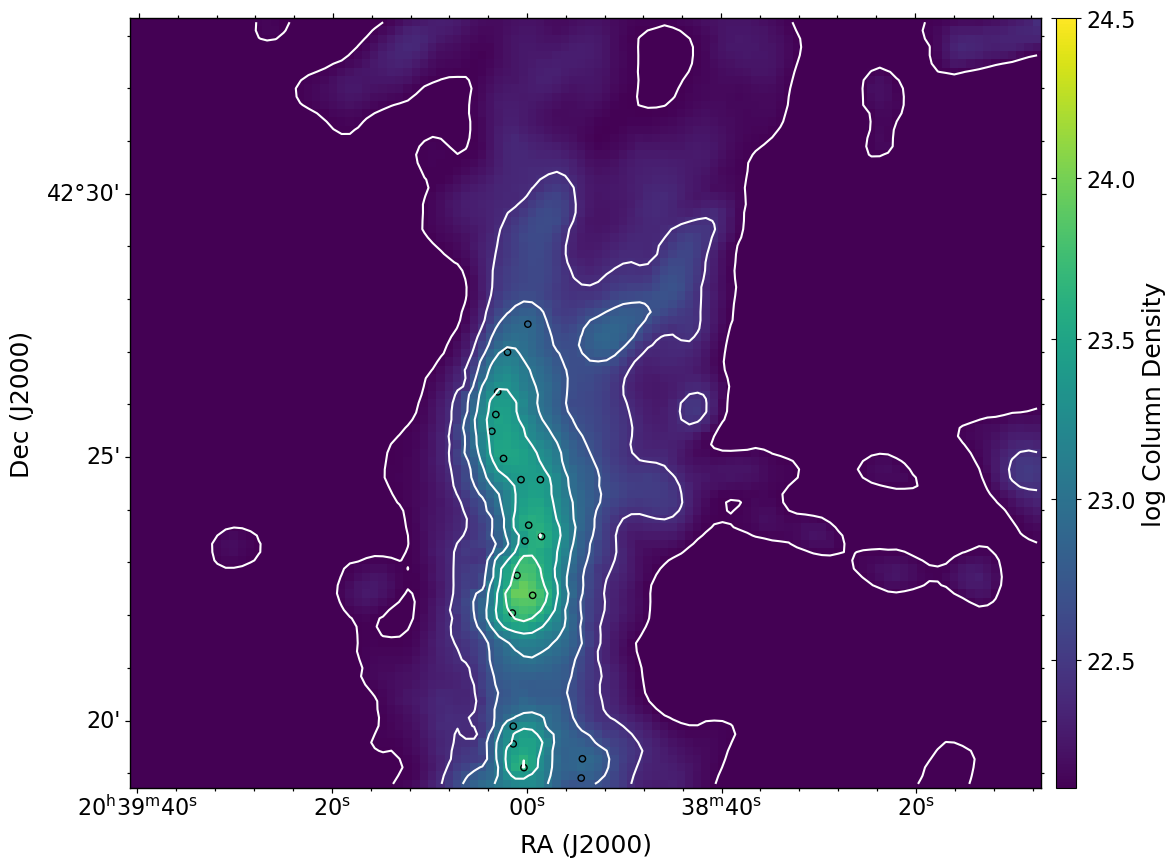

In [12]:
filename2='..\FITS_file\DR21_LogNH2_Repr.fits'

Herschel = fits.open(filename2)
MapHer250 = Herschel[0]

title = 'SIMPLIFI'

# figure
width  = 50
height = 50
cmap = 'plasma'

title_size = 16
tick_labels = 15
label_plot = 15
label_colorbar = 15
tick_colorbar = 15
label_fontsize = 20

SNRi_cut = 100
scalevec = 0.5 #1px = scalevec * 1% pol 
vec_legend = 5.0



#### SCRIPT
fig = plt.figure(figsize=(13,10))
gc = FITSFigure(MapHer250,figure=fig)
gc.show_colorscale(cmap='default',vmin = 22.1,vmax = 24.5)
gc.add_colorbar(location='right', width=0.2, pad=0.15, ticks=None,axis_label_text= 'log Column Density')
gc.show_contour(colors = 'white',levels = 7)
gc.show_circles(RA_array,DEC_array,0.001)
plt.show()


We have two arrays DiffPol and eDiffPol which are the square of differences in polarization angles with seperation l, l + k

1st method.

define strucuture function (SF) at l as np.sqrt( np.mean ( DiffPol ))

defince uncertainities ( $\sigma_{SF}$ ) at l as np.sqrt( np.mean ( eDiffPol ))

SF_total = ( ( $SF )^2$ - ( $\sigma_{SF})^2$ )$^{1/2}$

2nd method

SF_total = (np.mean( DiffPol ) - np.mean( eDiffPol ) )$^{1/2}$

